<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#James-Koppel's-example-1" data-toc-modified-id="James-Koppel's-example-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>James Koppel's example 1</a></span><ul class="toc-item"><li><span><a href="#Independent-choice-semantics-vs-program-trace-semantics" data-toc-modified-id="Independent-choice-semantics-vs-program-trace-semantics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Independent choice semantics vs program trace semantics</a></span></li><li><span><a href="#Trace-semantics-probability-tree" data-toc-modified-id="Trace-semantics-probability-tree-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Trace semantics probability tree</a></span></li><li><span><a href="#Independent-choice-semantics-probability-tree" data-toc-modified-id="Independent-choice-semantics-probability-tree-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Independent choice semantics probability tree</a></span></li><li><span><a href="#Trace-Semantics-Petri-Net" data-toc-modified-id="Trace-Semantics-Petri-Net-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Trace Semantics Petri Net</a></span></li><li><span><a href="#Trace-semantics-Petri-Net-with-value-and-probability-transmitted-via-tokens" data-toc-modified-id="Trace-semantics-Petri-Net-with-value-and-probability-transmitted-via-tokens-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Trace semantics Petri Net with value and probability transmitted via tokens</a></span><ul class="toc-item"><li><span><a href="#Observations-and-comments:" data-toc-modified-id="Observations-and-comments:-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Observations and comments:</a></span></li></ul></li></ul></li><li><span><a href="#Example-involving-conditioning-and-counterfactual-on-a-graph-with-dynamic-dependencies-and-interesting-conditioning-dependencies" data-toc-modified-id="Example-involving-conditioning-and-counterfactual-on-a-graph-with-dynamic-dependencies-and-interesting-conditioning-dependencies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example involving conditioning and counterfactual on a graph with dynamic dependencies and interesting conditioning dependencies</a></span><ul class="toc-item"><li><span><a href="#Factual-world-Probability-Tree-mechanism-for-$Z=0$" data-toc-modified-id="Factual-world-Probability-Tree-mechanism-for-$Z=0$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Factual world Probability Tree mechanism for $Z=0$</a></span></li><li><span><a href="#Conditioned-on-$Z=0$" data-toc-modified-id="Conditioned-on-$Z=0$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Conditioned on $Z=0$</a></span></li><li><span><a href="#Intervene-on-$Z=1$" data-toc-modified-id="Intervene-on-$Z=1$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Intervene on $Z=1$</a></span></li><li><span><a href="#Counterfactual" data-toc-modified-id="Counterfactual-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Counterfactual</a></span></li><li><span><a href="#Factual-world:" data-toc-modified-id="Factual-world:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Factual world:</a></span></li></ul></li></ul></div>

In [5]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from probability_trees import MinCut, Critical, PTree
from IPython.display import Latex

# James Koppel's example 1

From the [google doc](https://docs.google.com/document/d/1OUApkwqTvq8cVU8P0VELLo2LPfB6p7PPdcaHhZbtrvM/edit):  
```julia
A = bernoulli(0.5)
B = bernoulli(0.5)
If (A) {
  Y = 1
  Z = 1
} else {
  Y = 0
  Z = 0
}

If (B && Y) {
  W = 1
} else {
  W = 0
}
```

## Independent choice semantics vs program trace semantics

David Poole distinguishes between Independent choice semantics, where every variable is defined for all values in all worlds, and Program trace semantics, where variables are only defined for the values they take for a particular trace.


This lecture by David Poole is short (11 minutes) but contains a concise summary of  how probabilistic programming languages, structural causal models, bayes nets, and logic programming are related:
 
1. ([0.59](https://youtu.be/L_D9Xne6ATc?t=59)) All probabilistic programming languages are basically generalizations of structural causal models:  deterministic relationships with probability distributions over exogenous variables.

2. ([1:31](https://youtu.be/L_D9Xne6ATc?t=91))  All PPLs have the following features:
    * All PPL's use probabilistic inputs,
    * condition on observations, and 
    * query for distributions. 
    * Learning probabilities from data
    
    PPL's employ inference which is much faster than, but equivalent to, rejection sampling for computing posterior distributions

    Note:  Adding the `do()` operator enables meaningful counterfactual queries.

3. ([2:29](https://youtu.be/L_D9Xne6ATc?t=149))  Any Bayesian network can be represented as a probabilistic program or equivalently as a structural causal model (with probabilistic inputs and bidirectional deterministic relationships)

4.  ([4:16](https://youtu.be/L_D9Xne6ATc?t=256)) PPLs face several choices about what it means to assign values to variables encountered in the execution of a program
Rejection sampling semantics samples from the joint distribution and rejects any sample that does not meet the condition. (Simplest, but most inefficient approach)
Independent choice semantics treats each choice of value assignments to the random inputs as a possible world (This is the logic programming approach)
Program trace semantics only creates a possible world for each choice of value assignments encountered in an execution path. (This is what PPLs typically do)
Abductive semantics only creates a possible world for each choice needed to infer observations and a value for a query. (This is the most parsimonious approach. May be what Omega_C already does)

5. ([6:43](https://youtu.be/L_D9Xne6ATc?t=403)) variables are only defined in one trace and not another, this creates problems for inference and learning (These problems are mostly solved nowadays with MCMC and variational inference).

6.  ([9:03](https://youtu.be/L_D9Xne6ATc?t=543)) (How do we align ontologies of causal knowledge with ontologies of observations about the world?  (This problem is partially resolved with rich knowledge representation languages like BEL that are grounded in observation ontologies).       
 
The video is missing details that are present in [these slides](https://www.cs.ubc.ca/~poole/talks/IndependentChoicesTalk2014.pdf), and the slides are missing details that are contained in  [this  paper](https://sciwheel.com/work/#/items/9526992/detail?collection=320250).
 
 


## Trace semantics probability tree

In [1]:
def trace_semantics_tree( bvar ):
    if 'A' not in bvar:
#       A = bernoulli(0.5)
        return [(0.5, 'A=0'),
                (0.5, 'A=1')]
    if 'B' not in bvar:
#       B = bernoulli(0.5)
        return [(0.5, 'B=0'),
                (0.5, 'B=1')]
    if ('Y' not in bvar) or ('Z' not in bvar):
        if bvar['A'] == '1':
#           If (A) {
#              Y = 1
#              Z = 1
#           }
            return [(1, 'Y=1,Z=1')]
        else:
#           else {
#             Y = 0
#             Z = 0
#           }
            return [(1,'Y=0,Z=0')]
    if 'W' not in bvar:
        if (bvar['B'] == '1') and (bvar['Y'] == '1'):
#           If (B && Y) {
#             W = 1
#           }
            return [(1, 'W=1')]
        else:
#           else {
#             W = 0
#           }
            return [(1, 'W=0')]

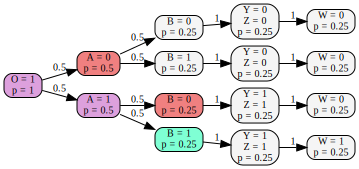

In [34]:
trace_semantics = PTree.fromFunc(trace_semantics_tree)
trace_semantics.show(show_prob=True,cut=trace_semantics.prop('W=1'),
                    crit=trace_semantics.critical(trace_semantics.prop('W=1')))

## Independent choice semantics probability tree

In [35]:
def independent_choice_semantics_tree( bvar ):
    if 'A' not in bvar:
        return [(0.5, 'A=0'),
                (0.5, 'A=1')]
    if 'B' not in bvar:
        return [(0.5, 'B=0'),
                (0.5, 'B=1')]
    if ('Y' not in bvar) or ('Z' not in bvar):
        if bvar['A'] == '1':
            return [(0, 'Y=0,Z=0'),
                    (0, 'Y=0,Z=1'),
                    (0, 'Y=1,Z=0'),
                    (1, 'Y=1,Z=1')]
        else:
            return [(1, 'Y=0,Z=0'),
                    (0, 'Y=0,Z=1'),
                    (0, 'Y=1,Z=0'),
                    (0, 'Y=1,Z=1')]
    if 'W' not in bvar:
        if (bvar['B'] == '1') and (bvar['Y'] == '1'):
            return [(0, 'W=0'),
                    (1, 'W=1'),]
        else:
            return [(1, 'W=0'),
                    (0, 'W=1')]
    return None

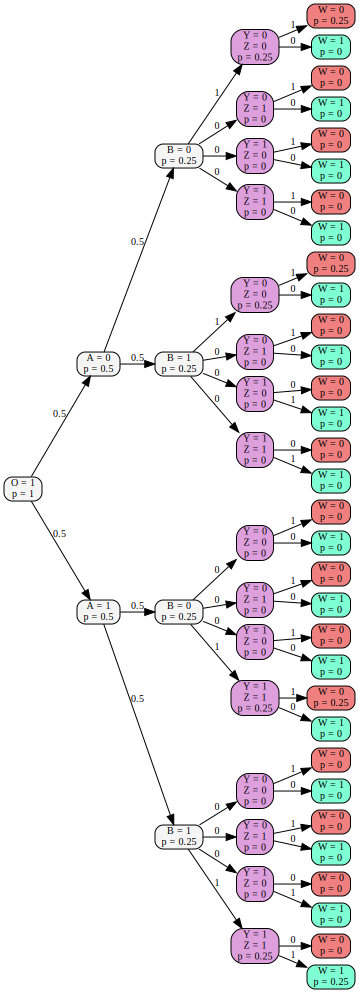

In [36]:
independent_choice_semantics = PTree.fromFunc(independent_choice_semantics_tree)
independent_choice_semantics.show(show_prob=True,cut=independent_choice_semantics.prop('W=1'),
                    crit=independent_choice_semantics.critical(independent_choice_semantics.prop('W=1')))

## Trace Semantics Petri Net 
0. two kinds of nodes: state and decision nodes 
1. at most one token per node 
2. every transition from a decision node has a weight 
3. the weights of transitions off a single node sum to 1
4. if two transitions share a parent, then they have the exact same parent set.  
5. the graph is acyclic. 
One can imagine future work relaxing (5).

We split nodes into “state nodes” (representing a variable assignment) and “decision nodes” (representing a decision involving that variable about to be made). State nodes will be copied into one or more decision nodes . I’ll just be drawing these as direct edges between states. 


In [60]:
import snakes.plugins
nets = snakes.plugins.load('gv', 'snakes.nets', 'nets')
from nets import (Place, PetriNet, Transition, MultiSet, 
                  Expression, Marking, OneOf, Substitution, 
                  Test, Tuple, Variable,Value)
from IPython.display import Image

## Trace semantics Petri Net with value and probability transmitted via tokens

In [84]:
def trace_semantics_petri_net():
    n = PetriNet("N")
    # State Nodes               # (value, probability)
    n.add_place(Place("Root=1", [(1,1)]))
    n.add_place(Place("A=0"))
    n.add_place(Place('A=1'))
    n.add_place(Place("B=0"))
    n.add_place(Place('B=1' ))
    n.add_place(Place("Y=0"))
    n.add_place(Place('Y=1'))
    n.add_place(Place("Z=0"))
    n.add_place(Place('Z=1'))
    n.add_place(Place("W=0"))
    n.add_place(Place('W=1'))
    
    # Decision Nodes
    n.add_transition(Transition('A if Root=1',Expression("Root==1") ))
    n.add_transition(Transition('B if Root=1', Expression("Root==1")))
    n.add_transition(Transition('Y=1 if A=1', Expression("A==1")))
    n.add_transition(Transition('Z=1 if A=1', Expression("A==1")))
    n.add_transition(Transition('Y=0 if A=0', Expression("A==0")))
    n.add_transition(Transition('Z=0 if A=0', Expression("A==0")))
    n.add_transition(Transition('W=1 if B=1 and Y=1', Expression("(B==1) and (Y==1)")))
    n.add_transition(Transition('W=0 if B=0 or Y=0', Expression("(B==0) or (Y==0)")))
    
    # Arcs from States to Decisions
    n.add_input("Root=1","A if Root=1", Tuple([Variable("Root"), Variable("p")]))
    n.add_input("Root=1", "B if Root=1", Tuple([Variable("Root"), Variable("p")]))
    
    n.add_input("A=0","Y=0 if A=0", Tuple([Variable('A'),Variable("p")] ))
    n.add_input("A=0","Z=0 if A=0", Tuple([Variable("A"), Variable("p")]))
    n.add_input("A=1","Y=1 if A=1", Tuple([Variable("A"), Variable("p")]))
    n.add_input("A=1","Z=1 if A=1", Tuple([Variable("A"), Variable("p")]))
    
    n.add_input("B=0", 'W=0 if B=0 or Y=0',Tuple([Variable('W'), Variable("p")] ))
    n.add_input("Y=0", 'W=0 if B=0 or Y=0',Tuple([Variable('W'), Variable("p")] ))
    
    n.add_input("B=1", 'W=1 if B=1 and Y=1', Tuple([Variable('W'), Variable("p") ]))
    n.add_input("Y=1", 'W=1 if B=1 and Y=1', Tuple([Variable('W'), Variable("p") ]))
    
    # Arcs from Decisions to States have a weight that sums to one.
    n.add_output("A=0", "A if Root=1", Tuple([Variable("A"), Expression("p*0.5")]))
    n.add_output("A=1", "A if Root=1",  Tuple([Variable("A"), Expression("p*0.5")]))
    n.add_output("B=0", "B if Root=1",  Tuple([Variable("B"), Expression("p*0.5")]))
    n.add_output("B=1", "B if Root=1",  Tuple([Variable("B"), Expression("p*0.5")]))

    n.add_output("Y=0", "Y=0 if A=0", Tuple([Variable("Y"), Expression("p")]))
    n.add_output("Z=0", "Z=0 if A=0",  Tuple([Variable("Z"), Expression("p")]))
    n.add_output("Y=1", "Y=1 if A=1", Tuple([Variable("Y"), Expression("p")]))
    n.add_output("Z=1", "Z=1 if A=1", Tuple([Variable("Z"), Expression("p")]))
    
    n.add_output( "W=0",'W=0 if B=0 or Y=0',  Tuple([Variable("W"), Expression("p")]))
    n.add_output( "W=1", 'W=1 if B=1 and Y=1', Tuple([Variable("W"), Expression("p")]))

    return n

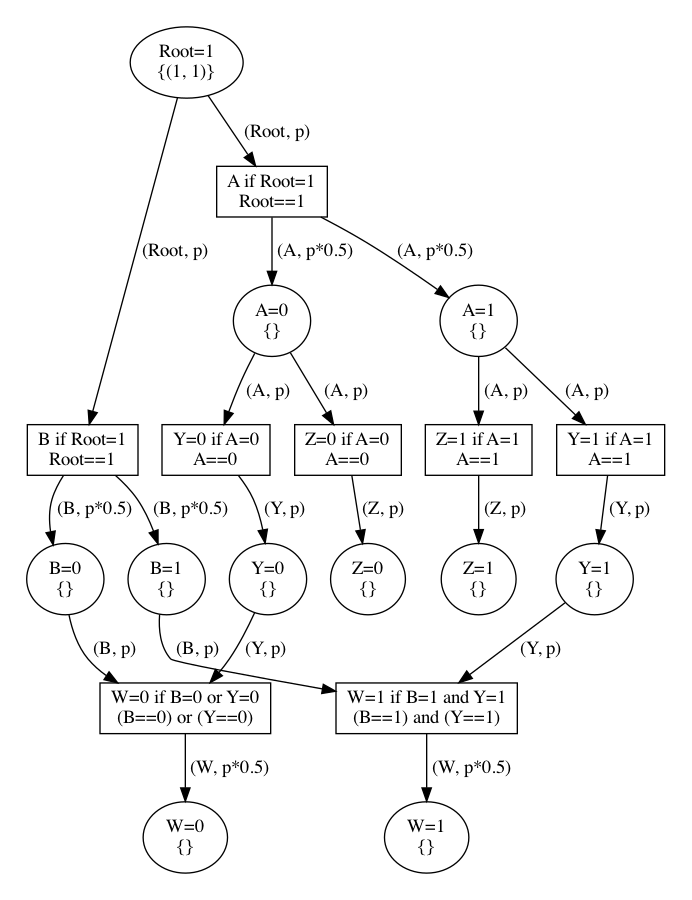

In [83]:
n.draw('trace_semantics_pnet_tuple.png')
Image('trace_semantics_pnet_tuple.png')

### Observations and comments:
See the `Root` node or the `A=0` nodes? Those are state nodes. See the many unlabeled nodes branching off them? Those  are the decision nodes. Interpret this as “when a token enters the `A=0` node, create a token on each child decision node.” This is not the proper way to draw this in a Petri net, but it’s notationally convenient. 
The graph is much more compact than the corresponding probability tree. Actually, it looks almost exactly like a causal Bayes net. But we shall soon see that this formalism can model dynamic dependencies, like probability trees and unlike causal DAGS.

We could add extra transitions of 0 probability from the `A=0` state to the `Y=1` state, from `A=0` state to the `Z=0` state, etc. We would then have the choice of either cloning the `Y=0` state (effectively giving us a `Y=0 && A=0` state and a `Y= 0 && A= 1` state) or not. The clone might be desirable if there’s a property that depends on both `Y` and `A`. But it is also possible to express that just by having a decision that draws from the two preexisting `Y` and `A` states.


A similar kind of sharing is possible in probability trees (DFA minimization), but probably less effective; fewer independent subgraphs.
We can already see a graphical cut separating `W` from `A`. It is much easier to see how to develop a notion of d-separation on this Petri net than on a probability tree.
We see that we can encode an arbitrary CPT. E.g.: To express $P(A | B, C, \lnot D)$, just have a decision state whose parents are `B=1`, `C=1`, `D=0`, with probabilistic transitions into the values of `A`.



# Example involving conditioning and counterfactual on a graph with dynamic dependencies and interesting conditioning dependencies

```julia
X = bernoulli(0.8)

If (X) {
  Y = bernoulli(0.6)
  Z = Y XOR bernoulli(0.2)
} else {
  Z= bernoulli(0.8)
  Y =Z XOR bernoulli(0.4)
}

W = Y && Z && bernoulli(0.6)
```



In [24]:
def dynamic_dependencies( bvar ):
    if 'X' not in bvar:
        # X = bernoulli(0.8)
        return [(0.2, 'X=0'),
                (0.8, 'X=1')]
    if 'Y' not in bvar:
        if bvar['X'] == '1':
            # Y = bernoulli(0.6)
            return [(0.4, 'Y=0'),
                    (0.6, 'Y=1')]
        if 'Z' not in bvar:
            # Z = bernoulli(0.8) when X==0
            return [(0.2, 'Z=0'),
                    (0.8, 'Z=1')]
        if bvar['Z'] == '0':
            # Y = Z XOR bernoulli(0.4) when Z == 0
            return [(0.6,'Y=0'),
                    (0.4,'Y=1')]
        else:
            # Y = Z XOR bernoulli(0.4) when Z == 1
            return [(0.4, 'Y=0'),
                    (0.6, 'Y=1')]
    if 'Z' not in bvar:
        if bvar['X'] == '1':
            if bvar['Y'] == '0':
                # Z = Y XOR bernoulli(0.2) when Y==0
                return [(0.8, 'Z=0'),
                        (0.2, 'Z=1')]
            else:
                # Z = Y XOR bernoulli(0.2) when Y==1
                return [(0.2, 'Z=0'),
                        (0.8, 'Z=1')]
        else:
            # Z = bernoulli(0.8)
            return [(0.2, 'Z=0'),
                    (0.8, 'Z=1')]
    if 'W' not in bvar:
        if (bvar['Y'] == '1') and (bvar['Z'] == '1'):
            # W = Y && Z && bernoulli(0.6) when Y==1 and Z==1
            return [(0.4, 'W=0'),
                    (0.6, 'W=1')]
        else:
            # W = Y && Z && bernoulli(0.6) == 0 when Y==0 or Z==0
            return [(1, 'W=0'),
                    (0, 'W=1')]
    return None
            
            

## Factual world Probability Tree mechanism for $Z=0$

In [25]:
factual = PTree.fromFunc(dynamic_dependencies)
Z_is_0 = factual.prop('Z=0')
show_factual_Z_is_0 = factual.show(show_prob=True,
                                              cut=Z_is_0, 
                                              crit=factual.critical(Z_is_0) )
#show_example3_factual_Z_is_0

<IPython.core.display.Latex object>

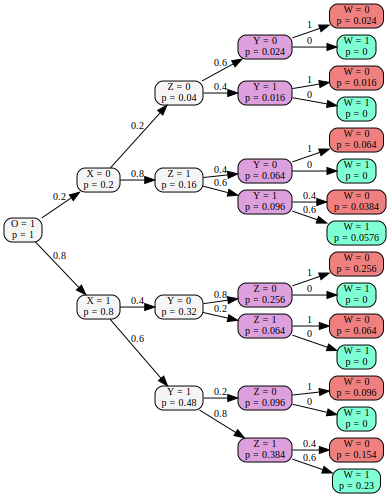

In [26]:
W = factual.prop('W=1')
show_factual_W = factual.show(show_prob=True,
                                              cut=W, 
                                              crit=factual.critical(W) )
display(Latex(f'$$P(W)={factual.prob(W)}$$'))
show_factual_W

## Conditioned on $Z=0$


In [27]:
see_Z_is_0 = factual.see(Z_is_0)
show_see_z_is_0 = see_Z_is_0.show(show_prob=True, cut=Z_is_0, crit=see_Z_is_0.critical(Z_is_0))
#show_see_z_is_0

<IPython.core.display.Latex object>

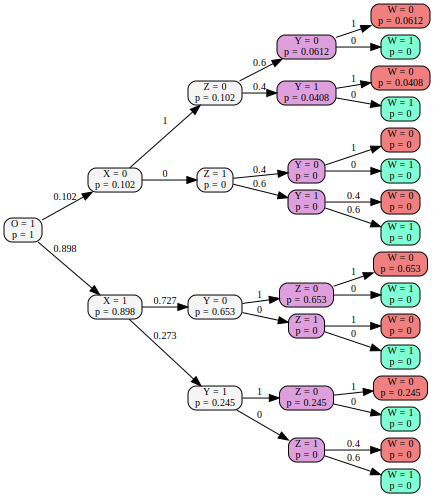

In [28]:
show_W_given_z_is_0 = see_Z_is_0.show(show_prob=True, cut=W, crit=see_Z_is_0.critical(W))
display(Latex('$$P(W|Z=0)='
             f'{see_Z_is_0.prob(W)}$$'))
show_W_given_z_is_0

## Intervene on $Z=1$



In [29]:
Z_is_1 = see_Z_is_0.prop('Z=1')
do_Z_is_1 = see_Z_is_0.do(Z_is_1)
show_do_Z_is_1 = do_Z_is_1.show(show_prob=True,
                                cut=Z_is_1,
                                crit=do_Z_is_1.critical(Z_is_1))
#show_do_Z_is_1

<IPython.core.display.Latex object>

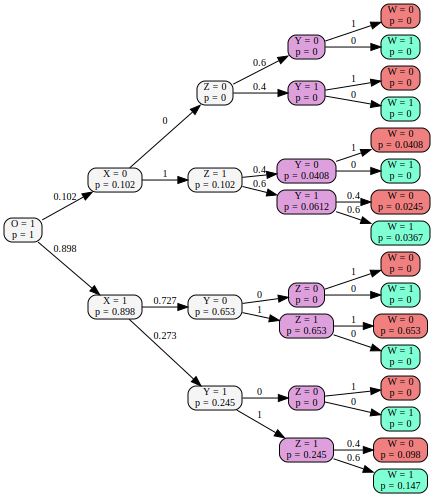

In [30]:
show_W_given_do_Z_is_1 = do_Z_is_1.show(show_prob=True,
                                               cut=W,
                                               crit=do_Z_is_1.critical(W))
display(Latex('$$P(W|Z=0,Z\leftarrow 1)='
             f'{do_Z_is_1.prob(W)}$$'))
show_W_given_do_Z_is_1

## Counterfactual



In [31]:
counterfactual = factual.cf(tree_prem=see_Z_is_0,
                                     cut_subj =Z_is_1)
show_counterfactual = counterfactual.show(show_prob=True, 
                                          cut=Z_is_1,
                                          crit=counterfactual.critical(Z_is_1))
#show_counterfactual

Note that the counterfactual value for $W_{Z\leftarrow 1}$ is the same as the factual value for $W$ when intervening on $Z\leftarrow 1$. This is not always necessarily the case as demonstrated in [section 2.7.1](https://nbviewer.jupyter.org/github/COVID-19-Causal-Reasoning/probability_trees/blob/main/Causal_Reasoning_in_Probability_Trees.ipynb?flush_cache=true#Computing-a-counterfactual) of the Causal Reasoning in Probability Trees tutorial.

<IPython.core.display.Latex object>

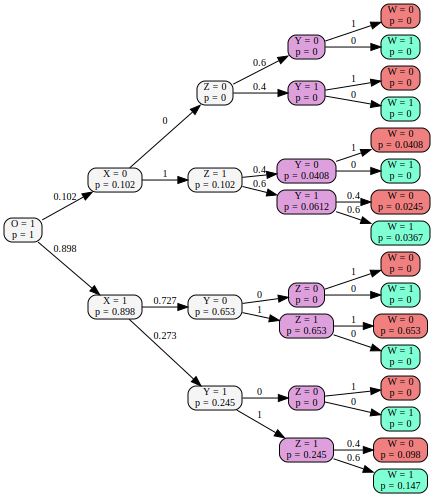

In [32]:
given_Z_is_0_show_W_in_a_world_where_Z_is_1 = counterfactual.show(show_prob=True,
                                                                  cut=W,
                                                                  crit=counterfactual.critical(W))
display(Latex('$$P(W_{Z\leftarrow 1}|Z=0)='
              f'{counterfactual.prob(W)}$$'))
given_Z_is_0_show_W_in_a_world_where_Z_is_1

## Factual world:

Encoding 1, where uses nodes like `phi(Y=0)`, which gets a token if and only if `Y=0` was true in either branch. (The terminology comes from the “phi-nodes” in [SSA](https://en.wikipedia.org/wiki/Static_single_assignment_form)


